In [9]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import mannwhitneyu

In [35]:
df = pd.read_csv('alpha_df.csv')
df['Treatment'] = df['Sample'].str[0]
new = df["Sample"].str.split("_", n = 1, expand = True)

#adding new columns to group by
df['Bee'] = new[0].str.strip('T').str.strip('C')
df['Day'] = new[1].str.strip('D')
df['Group'] = df['Treatment'] + df['Day']
df

,Unnamed: 0,Sample,Shannon_Index,Treatment,Bee,Day,Group
0,1,T1_D3,0.936445,T,1,3,T3
1,2,T10_D3,0.806340,T,10,3,T3
2,3,T11_D3,0.974710,T,11,3,T3
3,4,T13_D3,0.641606,T,13,3,T3
4,5,T14_D3,1.442691,T,14,3,T3
...,...,...,...,...,...,...,...
109,110,C5_D3,1.399546,C,5,3,C3
110,111,C6_D3,1.260582,C,6,3,C3
111,112,C7_D3,1.407365,C,7,3,C3
112,113,C8_D3,1.299063,C,8,3,C3


T-test for significance between control and treatment groups:

In [11]:
df_0 = df[df['Day']=='0']
cdf_0 = df_0[df_0['Group']=='C0']
cdf_0

tdf_0 = df_0[df_0['Group']=='T0']
tdf_0
res0 = mannwhitneyu(x=cdf_0['Shannon_Index'], y=tdf_0['Shannon_Index'], alternative='less')
res0

MannwhitneyuResult(statistic=93.0, pvalue=0.30784678472674787)

In [12]:
df_3 = df[df['Day']=='3']

cdf_3 = df_3[df_3['Group']=='C3']
cdf_3

tdf_3 = df_3[df_3['Group']=='T3']
tdf_3

res3 = mannwhitneyu(x=cdf_3['Shannon_Index'], y=tdf_3['Shannon_Index'])

In [13]:
df_5 = df[df['Day']=='5']

cdf_5 = df_5[df_5['Group']=='C5']
cdf_5

tdf_5 = df_5[df_5['Group']=='T5']
tdf_5

res5 = mannwhitneyu(x=cdf_5['Shannon_Index'], y=tdf_5['Shannon_Index'])

In [14]:
df_7 = df[df['Day']=='7']

cdf_7 = df_7[df_7['Group']=='C7']
cdf_7

tdf_7 = df_7[df_7['Group']=='T7']
tdf_7

res7 = mannwhitneyu(x=cdf_7['Shannon_Index'], y=tdf_7['Shannon_Index'])
#print(res[1])
#pval not less than 0.0001.  Is it acceptable?

In [15]:
#plot.annotate() to add stars for mann whitney U test significance

['C0', 'T0', 'C3', 'T3', 'C5', 'T5', 'C7', 'T7']


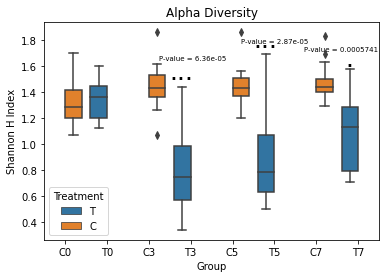

<Figure size 3600x720 with 0 Axes>

<Figure size 432x288 with 0 Axes>

In [34]:
order = ['C0', 'T0', 'C3', 'T3', 'C5', 'T5', 'C7', 'T7']
print(order)
#order = gene_stacked.groupby('gene').abundance.mean().sort_values(ascending=False).index[:20]
fig = plt.figure()
sns.boxplot(x='Group', y='Shannon_Index', hue='Treatment', data=df, order=order)
plt.title('Alpha Diversity')
plt.ylabel('Shannon H Index')
plt.annotate('...', (2.5, 1.5), fontsize=25) #trying to add this to the legend
plt.annotate('P-value = ' + str(round(res3[1], 7)), (2.25,1.65), fontsize=7)
plt.annotate('...', (4.5, 1.75), fontsize=25)
plt.annotate('P-value = ' + str(round(res5[1], 7)), (4.2,1.78), fontsize=7)
plt.annotate('.', (6.7, 1.6), fontsize=25)
plt.annotate('P-value = ' + str(round(res7[1], 7)), (5.7,1.72), fontsize=7)

plt.figure(figsize=(50,10))
plt.show()

plt.savefig('alpha_div.pdf')